<a href="https://colab.research.google.com/github/ArisaraPornwattanavichai/MachineLearning/blob/main/1_intro_computer_vision_sequentialNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Chapter, We'll learn how to build a very first computer vision project. Our target goal is classifying on Fashion MNIST dataset.

We first select a very simple NN model as sequential model. (Not conv. yet)
- The image size 28x28 is fed into the model, providing the result.

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [47]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

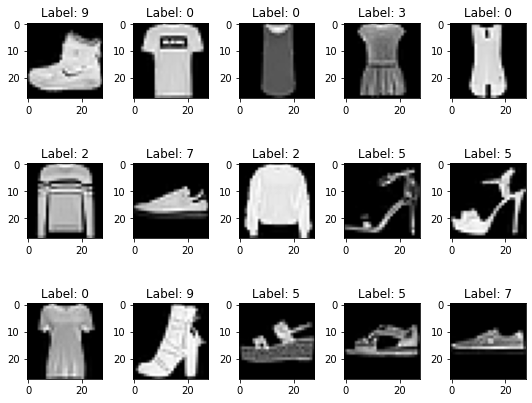

In [48]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = training_images[:num]
labels = training_labels[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [49]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(training_images.shape))
print('Y_train: ' + str(training_labels.shape))
print('X_test:  '  + str(test_images.shape))
print('Y_test:  '  + str(test_labels.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [50]:
training_images.max() # As can be seen, the max value of pixel in this data set is 255.

255

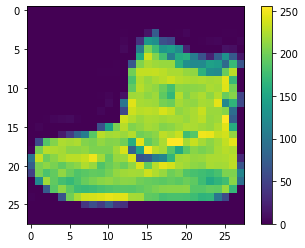

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [52]:
# Since the max value of pixel is 255, we then normalize all pixel value in between 0 to 1
# In this line, you are able to use other normalization tools. For example, normalization tools from sklearn
training_images = training_images / 255.0
test_images = test_images / 255.0

In [53]:
# Define a simple model structure
#sparse_categorical_crossentropy is appropriate for classifying multiple categories [10 kind to labels]
#Adam optimizer is improved from Sgd, which allow training process become faster and more effective [We train on 60,000 images]. 


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation =tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3794 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8904


In [54]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8686


[0.3543904423713684, 0.8686000108718872]

In [55]:
classification = model.predict(test_images)
print(classification[0])
print(test_labels[0])

[1.8416099e-06 3.4415567e-07 2.7535615e-08 3.0650192e-08 3.6117854e-08
 9.0900566e-03 4.9831992e-06 1.2632468e-02 1.4996076e-06 9.7826868e-01]
9


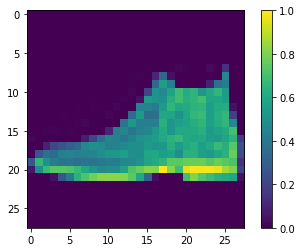

In [56]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#Next, we add callback to stop model training when prediction accuracy reach 95%.

In [57]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.95):
      print('Reach 95% accuracy now, stop training!')
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation =tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8232
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8652
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8786
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3126 - accuracy: 0.8852
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8921
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8963
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9003
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9030
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9073
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [58]:
model.evaluate(test_images, test_labels) # Yeahh We get high accuracy than previous one.
classification = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step - loss: 0.4446 - accuracy: 0.8818


In [59]:
import numpy as np
import pandas as pd
pred=[]
for i in classification:
  pred.append(np.argmax(i))
df = pd.DataFrame(
    {'True_label': test_labels.tolist(),
     'Predict_label': pred
    })

In [60]:
df

,True_label,Predict_label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [61]:
df.loc[df['True_label'] != df['Predict_label']] # see incorrect prediction rows

,True_label,Predict_label
12,7,5
17,4,2
23,9,5
25,4,2
40,6,0
...,...,...
9969,8,2
9972,2,6
9977,6,0
9989,4,2
